# Levy's Arcsine laws

In [122]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

plt.style.use('fast')

# 10,000 tossings of a coin
num_of_paths = 1000
num_of_trials = 10000
samples = np.random.sample((num_of_paths,num_of_trials))
f = lambda t : -1 if t < 0.50 else 1
f_vec = np.vectorize(f)
y = [f_vec(x) for x in samples]

# find the cumsum of the paths
s = [np.cumsum(path) for path in y]

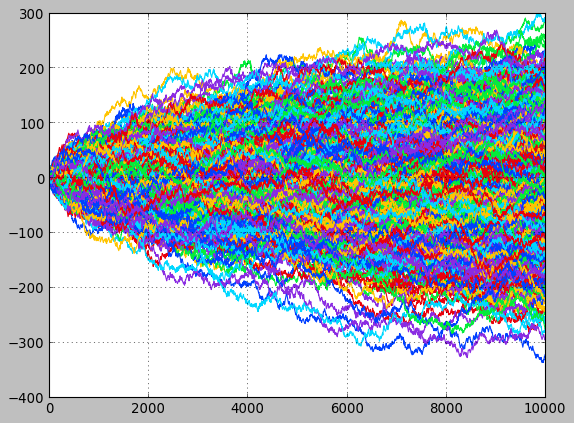

In [123]:
# Plot the paths
times = np.linspace(1,num_of_trials,num_of_trials)
paths = np.linspace(1,num_of_paths,num_of_paths,dtype=int)

plt.xlim(0.00000,10000)
for path_i in paths:
    plt.plot(times-1,s[path_i-1])

plt.grid(b=True, which='both')
plt.show()

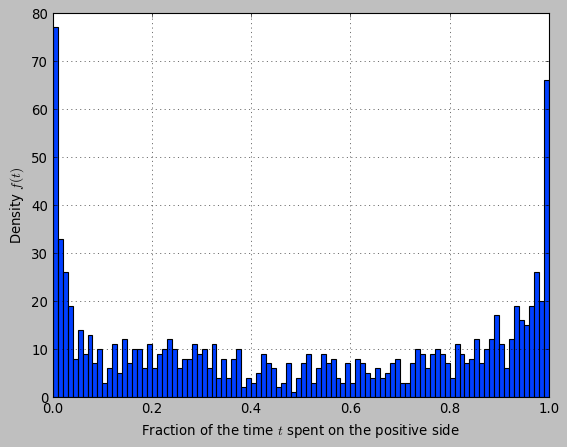

In [124]:
# Find the probability density f(t)=P(fraction of the time spent on the positive side = t)
frac_time_on_positive_side = [(s_i > 0).sum()/len(s_i) for s_i in s]
frac_time_on_negative_side = [(s_i <= 0).sum()/len(s_i) for s_i in s]
plt.hist(frac_time_on_positive_side, bins = 100)
plt.xlabel(r'Fraction of the time $t$ spent on the positive side')
plt.ylabel(r'Density $f(t)$')
plt.grid(True)
plt.show()

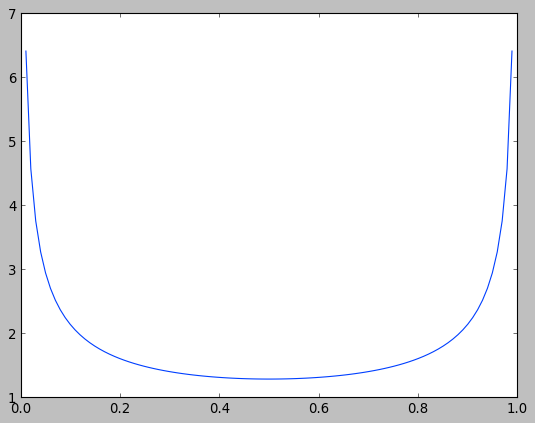

In [136]:
# Arcsine distribution PDF

t = np.linspace(0.01,0.99,100)
f = (2/np.pi)*(1/np.sqrt(np.multiply(t,(1-t))))
plt.plot(t,f)

Let $T$ be a random variable. $T$ is said to have an arcsine distribution, iff the density function $f(t)$ is given by :

$$f(t)=\frac{2}{\pi}\frac{1}{\sqrt{t(1-t)}}$$

The cdf is given by,

$$\begin{aligned}
F(t) &= \int {f(t)dt}  \\
     &= \frac{2}{\pi} \int \frac{1}{\sqrt{t(1-t)}} dt\\
     &= \frac{2}{\pi} \int \frac{1}{\sqrt{-(t^2-t)}} dt \\
     &= \frac{2}{\pi} \int \frac{1}{\sqrt{-(t^2-2\cdot(1/2)\cdot t)}} dt \\
     &= \frac{2}{\pi} \int \frac{1}{\sqrt{-(t^2-2\cdot(1/2)\cdot t+(1/4)-(1/4))}} dt \\
     &= \frac{2}{\pi} \int \frac{1}{\sqrt{-((t-1/2)^2-(1/4))}} dt \\
     &= \frac{2}{\pi} \int \frac{1}{\sqrt{(1/4) - (t-1/2)^2}} dt \\
     &= \frac{2}{\pi} \int \frac{2 dt}{\sqrt{1 - (2t-1)^2}} \\
\end{aligned}$$

Put $u = 2t - 1$. $du = 2 dt$. So,

$$\begin{aligned}
F(t) &= \frac{2}{\pi} \int \frac{du}{\sqrt{1 - u^2}} \\
     &= \frac{2}{\pi} \arcsin u \\
     &= \frac{2}{\pi} \arcsin (2t-1) \\
\end{aligned}$$

Put $t = \cos^2 \theta$. 

$2t - 1 = 2 \cos^2 \theta - 1 = \cos (2\theta) = \sin(\frac{\pi}{2} - 2\theta)$

So, $\arcsin (2t - 1) = \frac{\pi}{2} - 2(\frac{\pi}{2} - \arcsin(\sqrt{t})) = 2\arcsin \sqrt{t}-\frac{\pi}{2}$

The CDF is:
$$F(t)=\frac{2}{\pi}\arcsin \sqrt{t}$$

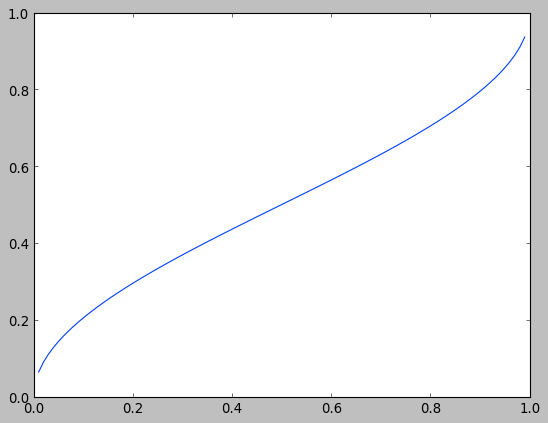

In [133]:
# Arcsine distribution CDF

t = np.linspace(0.01,0.99,100)
F = (2/np.pi) * np.arcsin(np.sqrt(t))
plt.plot(t,F)